##  *Statistics coded:* Quarterly national accounts - GDP and employment

Prepared by [**Hatem Alharazin**](hatemjamil.89@gmail.com) (EMOS).

This notebook aims at illustrating the Statistics Explained article on [Quarterly national accounts](https://ec.europa.eu/eurostat/statistics-explained/index.php?title=Quarterly_national_accounts_-_GDP_and_employment#Data_sources).

## Setting Packages up

In [3]:
#install.packages("restatapi")
library(restatapi)
library(ggplot2)
library(tseries)
library(readxl)
#library(tidyr)
#library(dplyr)
#library(plotly)

## GDP and Employment growth rate

In [54]:
assign("dmethod","curl",envir=.restatapi_env) 
#get_eurostat_dsd("namq_10_gdp",verbose=TRUE)
#assign("dmethod","auto",envir=.restatapi_env) 
#get_eurostat_dsd("namq_10_gdp",verbose=TRUE)
#assign("dmethod","wininet",envir=.restatapi_env) 
#get_eurostat_dsd("namq_10_gdp",verbose=TRUE)


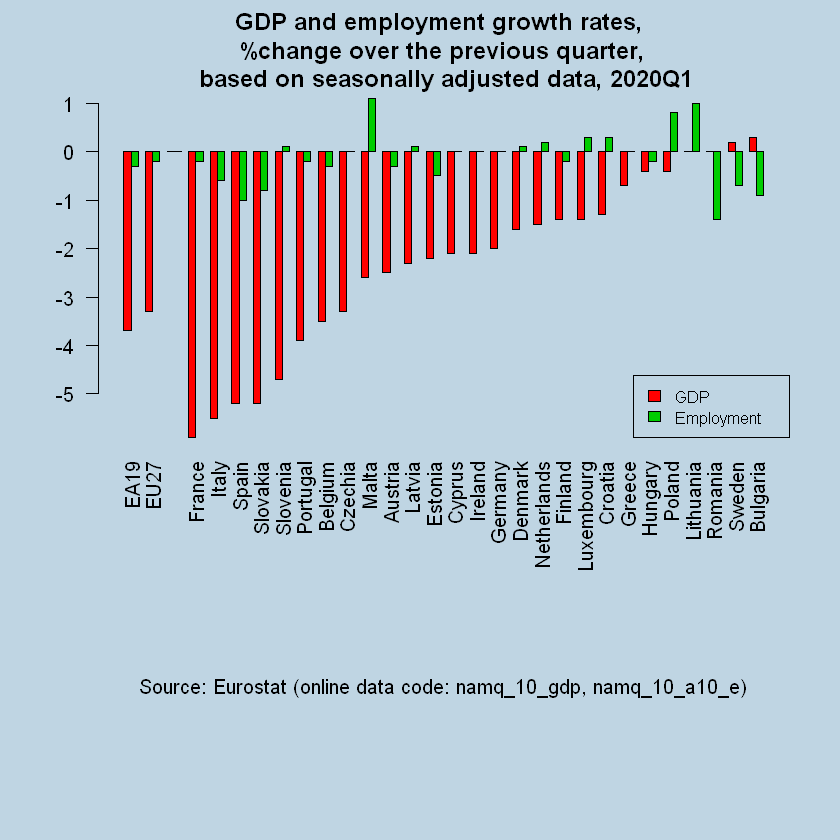

In [51]:
geo_code <- c("EA19","EU27_2020","FR","IT","ES","SK","SI","PT","EE","BE","CZ","LV","LU",
              "AT","MT","DE","DK","FI","EL","NL","CY","HR","HU","PL","LT","SE","BG","RO","IE")

dt_GDP <- get_eurostat_data("namq_10_gdp", filters=list(s_adj=c("SCA","SA"), UNIT="CLV_PCH_PRE",
                            na_item="B1GQ", GEO=geo_code), date_filter="2020:2020-03",
                            select_freq="Q", label=TRUE) 
dt_EMP <- get_eurostat_data("namq_10_a10_e", filters=list(s_adj=c("SCA","SA"), UNIT="PCH_PRE_PER",
                            na_item="EMP_DC", GEO=geo_code, nace_r2 = "TOTAL"),date_filter="2020:2020-03",
                            select_freq="Q", label=TRUE)

dt1 <- merge(dt_GDP[,c(4,6)], dt_EMP[,c(5,7)], by = "geo")
dt1[c(6,8,12),1] <- c("Germany","EA19","EU27")
dt1 <- as.matrix(dt1[,-1], rownames = dt1$geo)
dt1 <- dt1[order(dt1[,1]),]
dt2 <- rbind(dt1[c(7,10),],0,dt1[c(-7,-10),])


nf <- layout(matrix(c(1,2),ncol=1, byrow=TRUE), widths=c(6,6), heights=c(2,1))
par(bg = '#BFD5E3')

barplot(t(dt2), las = 2, beside = T, col = c(2,3), main = "GDP and employment growth rates, \n %change over the previous quarter, \n based on seasonally adjusted data, 2020Q1")
legend("bottomright", legend =c("GDP","Employment"), fill = c(2,3), box.lty = 1, cex = 0.8)

plot(c(0, 1), c(0, 1), ann = F, bty = 'n', type = 'n', xaxt = 'n', yaxt = 'n')
text(x = 0.5, y = 0.5, paste("Source: Eurostat (online data code: namq_10_gdp, namq_10_a10_e)"), cex = 1, col = "black", adj=0.5)



# Quarterly GDP growth


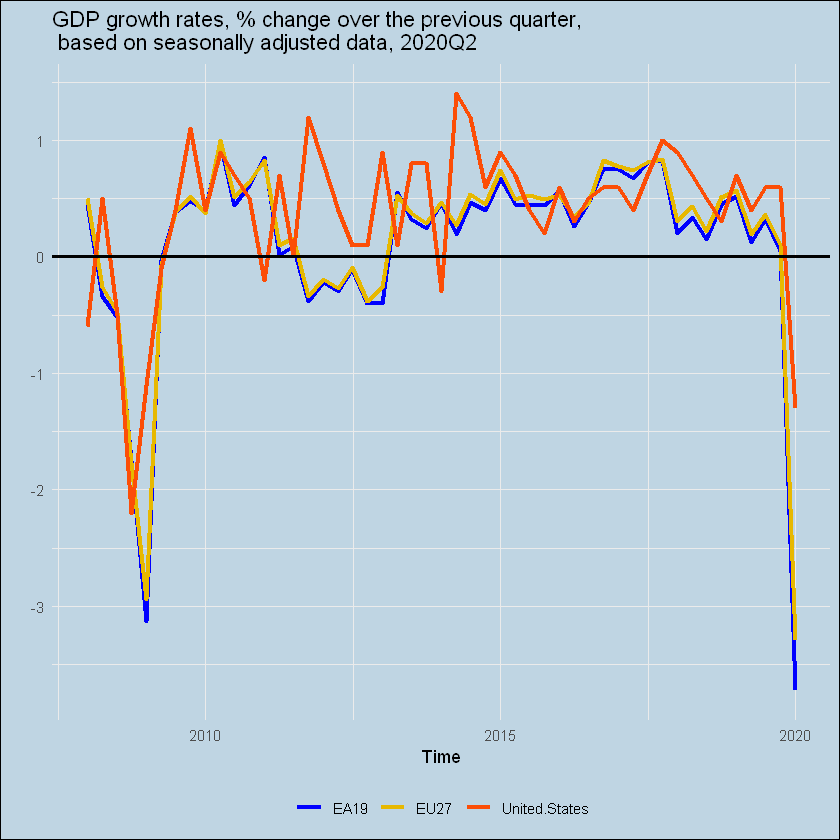

In [46]:
# Read the data
GDP_EA19 <- get_eurostat_data("namq_10_gdp", filters=list(s_adj=c("SCA"), UNIT="CON_PPCH_PRE",
                            na_item="B1GQ", GEO=c("EA19")), date_filter="2008:2020-01",
                            select_freq="Q", label=TRUE)

GDP_EU27 <- get_eurostat_data("namq_10_gdp", filters=list(s_adj=c("SCA"), UNIT="CON_PPCH_PRE",
                            na_item="B1GQ", GEO=c("EU27_2020")), date_filter="2008:2020-01",
                            select_freq="Q", label=TRUE) 

GDP_US <- get_eurostat_data("naidq_10_gdp", filters=list(s_adj=c("SCA"), UNIT="CLV_PCH_PRE",
                            na_item="B1GQ", GEO=c("US")), date_filter="2008:2020-01",
                            select_freq="Q", label=TRUE) 

#GDP_EU27_EA19 <- read.csv("~/Eurostatdataset/namq_10_gdp_1_Data.csv") # GDP of EU27 and EA19 2007Q4-2020Q2
#GDP_Unit_Stat <- read.csv("~/Eurostatdataset/naidq_10_gdp_1_Data.csv")# GDP of United States 2007Q4-2020Q2

GDP_df <- data.frame(GDP_EA19[,6], GDP_EU27[,6], GDP_US[,6])           # Merge GDP files in a data frame
GDP_TS <- ts(GDP_df, start = c(2008, 1), frequency = 4)                # Define data as time series
colnames(GDP_TS) <- c("EA19", "EU27", "United States")                 # change the names

Date_var <- seq(as.Date("2008/1/1"), as.Date("2020/3/1"), by = "quarter")
GDP_TS <- data.frame(GDP_TS,Date_var)
Stacked_data <- data.frame(GDP_TS[4], stack(GDP_TS[1:3]))

# Multiple line plot
p <- ggplot(Stacked_data, aes(x = Date_var, y = values)) + 
  geom_line(aes(color = ind), size = 1.3) +
  scale_color_manual(values = c("blue", "#E7B800", "#FC4E07")) +
  theme_minimal()
p <- p + theme(legend.position="bottom")+ 
         theme(legend.title = element_blank())

# Add horizontal line at y = 0
p <- p + geom_hline(yintercept=0, color = "black", size=1)
p <- p + theme(plot.background = element_rect(fill = "#BFD5E3"))

p + ggtitle("GDP growth rates, % change over the previous quarter,\n based on seasonally adjusted data, 2020Q2") +
  xlab("Time") + ylab(" ")



Don't forget to explain what you are doing...

# GDP growth by Member State

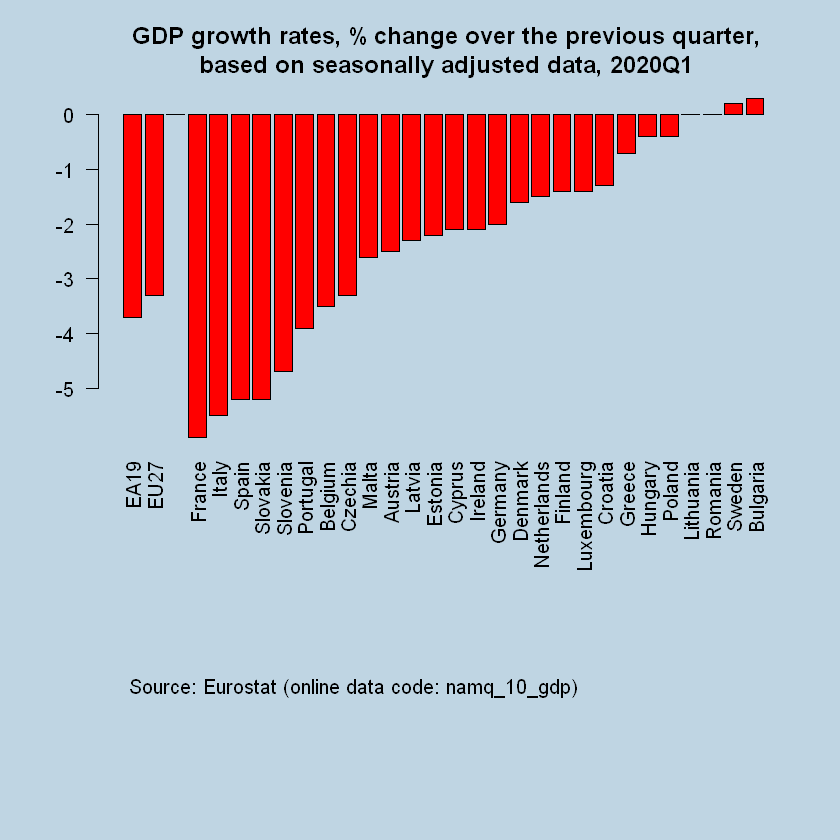

In [53]:
par(bg = '#BFD5E3')
nf <- layout(matrix(c(1,2),ncol=1, byrow=TRUE), widths=c(6,6), heights=c(2,1))
#par(pin=c(6,3))
barplot(t(dt2[,1]), las = 2, col = 2, main = " GDP growth rates, % change over the previous quarter,\n based on seasonally adjusted data, 2020Q1")
plot(c(0, 1), c(0, 1), ann = F, bty = 'n', type = 'n', xaxt = 'n', yaxt = 'n')
text(x = 0.5, y = 0.5, paste("Source: Eurostat (online data code: namq_10_gdp)"), cex = 1, col = "black", adj=0.7)


# GDP components and contributions to growth

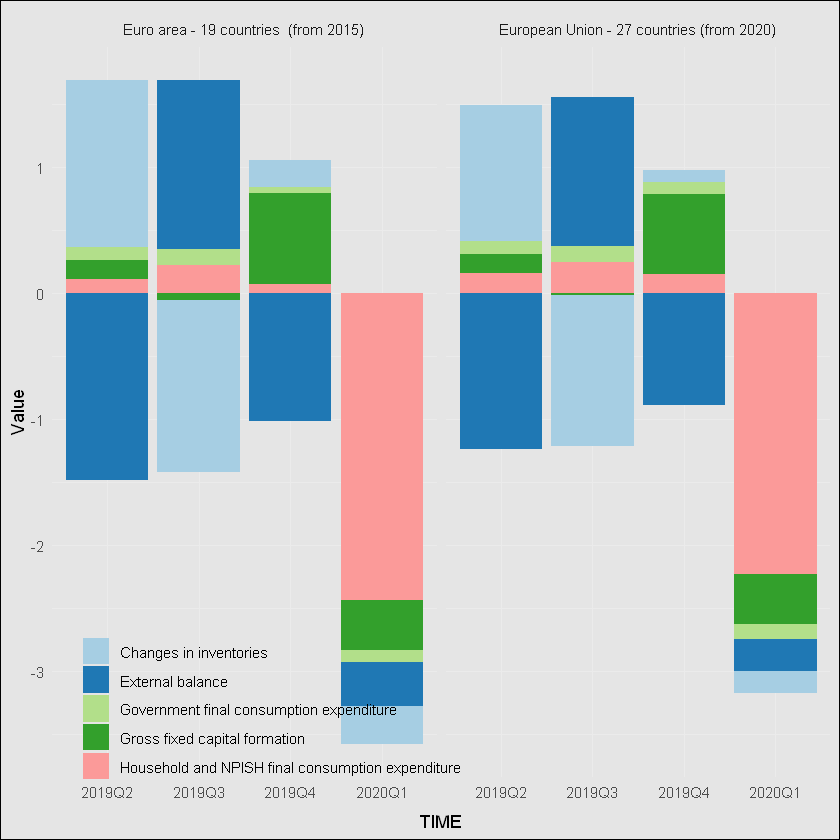

In [59]:
#GDP_comp <- read.csv("~/Eurostatdataset/Figure 3/namq_10_gdp_1_Data.csv") # EMP of EU27 and EA19 2007Q4-2020Q2

GDP_comp <- get_eurostat_data("namq_10_gdp", filters=list(s_adj=c("SCA"), UNIT="CON_PPCH_PRE",
                            na_item="B1GQ", GEO=c("EA19", "EU27_2020")), date_filter="2019-2:2020-01",
                            select_freq="Q", label=TRUE)

GDP_GR <- GDP_comp[which(GDP_comp$NA_ITEM == "Gross domestic product at market prices"), ]
GDP_comp_EU27 <- GDP_comp[which(GDP_comp$NA_ITEM != "Gross domestic product at market prices"), ]

p <- ggplot(data=GDP_comp_EU27, aes(x=TIME, y=Value, fill=NA_ITEM)) +
  geom_bar(stat="identity")+
  scale_fill_brewer(palette="Paired")+
  theme_minimal()
p <- p + theme(legend.position=c(0.3, 0.1))+ 
         theme(legend.title = element_blank())
p <- p + facet_grid(. ~ GEO)

#p <- p + geom_hline(yintercept=0, color = "black", size=1)
p + theme(plot.background = element_rect(fill = "gray90"))

# Quarterly employment growth

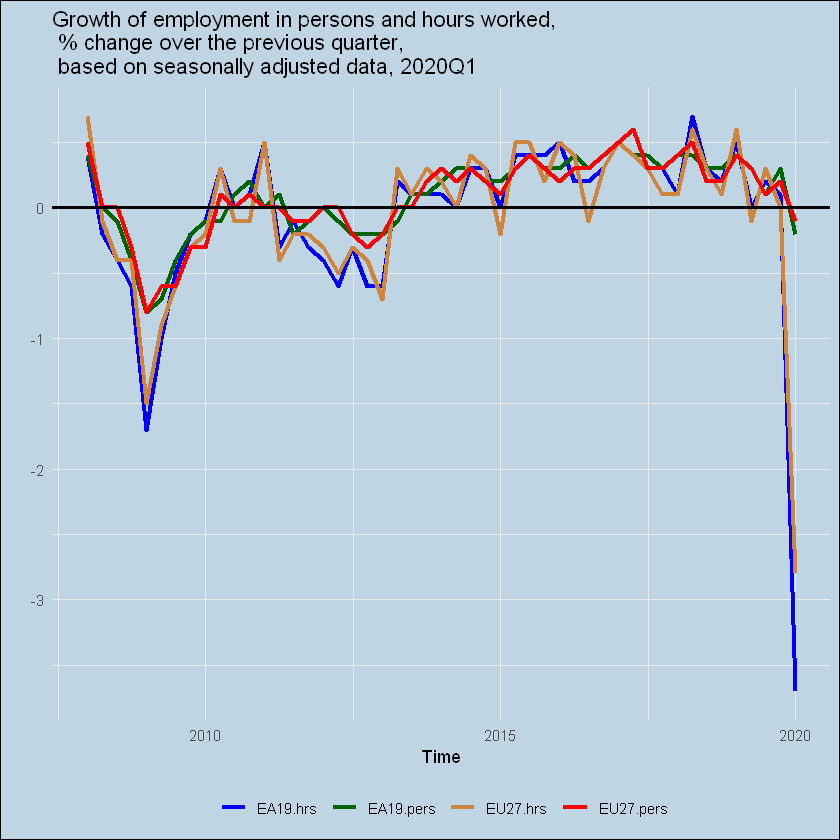

In [35]:
EMP_EU27_EA19 <- read.csv("~/Eurostatdataset/namq_10_a10_e_1_Data.csv") # EMP of EU27 and EA19 2007Q4-2020Q2
EMP_EU27_EA19$Series[EMP_EU27_EA19$GEO == "European Union - 27 countries (from 2020)" & EMP_EU27_EA19$UNIT == "Percentage change on previous period (based on persons)"] <- "EU27 pers"
EMP_EU27_EA19$Series[EMP_EU27_EA19$GEO == "European Union - 27 countries (from 2020)" & EMP_EU27_EA19$UNIT == "Percentage change on previous period (based on hours worked)"] <- "EU27 hrs"
EMP_EU27_EA19$Series[EMP_EU27_EA19$GEO == "Euro area - 19 countries  (from 2015)" & EMP_EU27_EA19$UNIT == "Percentage change on previous period (based on persons)"] <- "EA19 pers"
EMP_EU27_EA19$Series[EMP_EU27_EA19$GEO == "Euro area - 19 countries  (from 2015)" & EMP_EU27_EA19$UNIT == "Percentage change on previous period (based on hours worked)"] <- "EA19 hrs"
EMP_EU27_EA19 <- EMP_EU27_EA19[,-c(2,3)]
unstacked_data <- data.frame(unstack(EMP_EU27_EA19[,c(2,3)]))
Date_var <- seq(as.Date("2008/1/1"), as.Date("2020/3/1"), by = "quarter")
unstacked_data <- data.frame(unstacked_data, Date_var)

restacked_data <- data.frame(unstacked_data[5], stack(unstacked_data[1:4]))
# Multiple line plot
p <- ggplot(restacked_data, aes(x = Date_var, y = values)) + 
  geom_line(aes(color = ind), size = 1.3) +
  scale_color_manual(values = c("blue", "darkgreen", "tan3", "red")) +
  theme_minimal()
p <- p + theme(legend.position="bottom")+ 
         theme(legend.title = element_blank())

# Add horizontal line at y = 0
p <- p + geom_hline(yintercept=0, color = "black", size=1)
p <- p + theme(plot.background = element_rect(fill = "#BFD5E3"))

p + ggtitle("Growth of employment in persons and hours worked,\n % change over the previous quarter,\n based on seasonally adjusted data, 2020Q1") +
  xlab("Time") + ylab(" ")


# Employment growth by Member State

# Employment levels

# Labour productivity